<a href="https://colab.research.google.com/github/hmerkle/deepRL/blob/main/DRL23_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 Understanding MDPs
## 1.1 Chess
You are tasked with creating an AI for the game of chess. To solve the problem
using Reinforcement Learning, you have to frame the game of chess as a Markov
Decision Process (MDP).

Describe both the game of chess formally as a MDP,
also formalize the respective policy.

-	states: arrangement of pieces on 8x8 field labeled as a tuples with a number from 1 to 8 and letter from A to H
-	actions: picking one piece and making a legal move with it in the current board arrangement -> each piece has its own set of possible actions
-	Transition function: probability distribution over opponent's possible moves in response to agent's action in current state 
-	reward:
  - if next state is a checkmate and agent wins game: reward +100
  -	if next state is checkmate and agent looses game: reward -100
  - positive reward if the move wins material: 1 for a pawn; 3 for a bishop or horse; 5 for a rook; 9 for a queen
  - negative reward if the move loses material

- policy:
  - probability distribution over possible actions with likelihood of each action relative to it's expected return

## 1.2 LunarLander
Check out the LunarLander environment on OpenAI Gym: [LunarLander-v2](https://www.gymlibrary.dev/environments/box2d/lunar_lander/).

Describe the environment as a MDP, include a description how the policy is
formalized.


- state: 
  - vector $[x,y,\vec{x},\vec{y},\alpha,\vec{\alpha}, L_1,L_2]$ with lander coordinates $x,y$, lander linear velocites $\vec{x},\vec{y}$, angle $\alpha$, angular velocity $\vec{\alpha}$, boolean values $L_1, L_2$ representing whether a lander leg is contacting the ground

- action: 
  - do nothing
  - fire left orientation engine
  - fire main engine
  - fire right orientation engine

- state dynamics:
  - determined by the physics of the game (i.e. gravity and wind settings of the environment) and the action the agent took

- reward: 
  - landing on landing pad (0,0): reward +100
  - landing away from landing pad: 100-[distance to landing pad]
  - crashing: reward -100
  - each leg ground contact: +10
  - firing main engine: -0.3
  - firing side engine: -0.03

- policy:
  - Categorical probability distribution over the 4 possible actions in each state

## 1.3 Model Based RL: Accessing Environment Dynamics
Discuss the Policy Evaluation and Policy Iteration algorithms from the lecture.
They explicitly make use of the environment dynamics $(p(s',r|s,a))$.

*    Explain what the environment dynamics (i.e. reward function and state
transition function) are and give at least two examples.

*    Discuss: Are the environment dynamics generally known and can practically be used to solve a problem with RL?

The state transition function $p(s'|s,a)$ gives the probability of ending up in a specific state $s'$ after performing action $a$ in state $s$.

For example in a simple GridWorld the function could return a high probability for the state $s'$ where the agent is one tile to right of where it was in state $s$ after performing the action $a=RIGHT$ and a (close to) zero probability for turning up in state $s'$ with the agent 5 tiles to left.

The reward function $p(r|s,a)$ quantifies how good performing action a in state s is. 

Example: In the GridWorld example taking the action $a=RIGHT$ when in a state where the agent is to the left of the goal state should give a high probability.

The environment dynamic $p(s',r|s,a)$ is the combination of the above.


2. When an agent starts a learning process in an environment, it usually doesn't have complete knowledge of the transition function or the reward function of the environment, especially in real world applications. The agent first needs to interact with the environment by taking actions, reaching different states and getting certain positive or negative rewards before it can estimate what might happen next time it takes that action in that state. Meaning, the agent first needs to update its estimates of the transition function and dynamics. The learning is therefore more by trial and error and the policy might not be optimal. If an agent acts in a game like chess for example, the rules and rewards are more clearly defined and therefore also the environment dynamics are known and the agent has an easier time to learn a good policy.

# Task 2 Implementing a GridWorld
GridWorlds are some of the most common tools for visualizing RL by creating an easily understandable and visually interpretable MDP (and especially
agents and their policy within them). Fundamentally a Gridworld consists of
an $m \times n$ sized world and the agent-position within this grid. The agent can
typically choose between four actions: $[LEFT, TOP, RIGHT, DOWN]$. Additionally, there is typically a goal - a specific tile, which the agent is supposed to
reach. When the agent reaches this tile, a reward is given and the environment
is reset. You are tasked with implementing such a GridWorld.

## 2.1 Look up some examples
Look up some examples of GridWorld! List at least three links or references to
different GridWorlds you could find online.

Sutton & Barto 2020: p.60 Example 3.5 and p.130 Example 6.5

https://towardsdatascience.com/reinforcement-learning-implement-grid-world-from-scratch-c5963765ebff

Reinforce.js: by Andrej Karpathy
https://cs.stanford.edu/people/karpathy/reinforcejs/


## 2.2 Implementing the MDP
First, make sure you understand the underlying MDP of a Gridworld.

*   Implement a GridWorld Class
*   Implement all key features defining an MDP in respectively named methods or attributes of this object
*   Specify whether your MDP is deterministic or stochastic

As you have seen in previously researched examples, typically GridWorlds add
some additional complexities for the agent. Some typical examples include Walls
(non-passable tiles), traps (tiles that penalize passing them with some negative
reward), or difficult terrain (typically icy or windy tiles, where agents are passed
onto certain neighboring tiles instead of arriving where they planned to). For
this task you may use the examples above or come up with your own ideas.

*   Implement at least two complexities for your agent to overcome. You
may use the examples above or come up with your own ideas (or take
inspiration from GridWorlds you found online)


In [ ]:
import numpy as np

In [ ]:
class GridWorld:
  def __init__(self, shape, start, goal, goal_reward = 2, step_punishment = -0.01):
    # initialize empty grid
    self.shape = shape
    self.grid = np.ndarray(shape, dtype=GridTile)
    for i in range(shape[0]):
      for j in range(shape[1]):
        self.grid[i,j]=GridTile((i,j), reward = step_punishment)
    
    # put agent on start tile
    self.grid[start].is_start = True
    self.grid[start].has_agent = True
    self.grid[start].visited = True
    self.agent_pos = start
    
    # set goal tile
    self.grid[goal].is_goal = True
    self.grid[goal].reward = goal_reward
    self.goal = goal
    
  # helper method used for testing
  def change_tile(self, index, tile):
    self.grid[index] = tile
    if tile.is_goal: self.goal = index

  # setter method
  def move_agent(self, target_tile):
    self.grid[self.agent_pos].has_agent = False
    self.agent_pos = target_tile.position
    target_tile.has_agent = True
    target_tile.visited = True

  # 
  def state_transition(self, action):
    # get current coordinates
    agent_x, agent_y = self.agent_pos

    # target = which tile would the agent like to go to?
    if action == "LEFT":
      target = (agent_x, agent_y-1)
    elif action == "RIGHT":
      target = (agent_x, agent_y+1)
    elif action == "UP":
      target = (agent_x-1, agent_y)
    elif action == "DOWN":
      target = (agent_x+1, agent_y)

    # if target is out of bounds stay put
    if target[0] < 0 or target[1] < 0 or target[0] > self.shape[0]-1 or target[1] > self.shape[1]-1:
      target_tile = self.grid[self.agent_pos]
    else:
      target_tile = self.grid[target]
    
    # reward
    r = 0

    # check tile types
    if not target_tile.passable:
      # stay where you are
      target_tile = self.grid[self.agent_pos]
      self.move_agent(target_tile)

    elif target_tile.effect == 'ice':
      # move to ice tile
      self.move_agent(target_tile)
      try:
        # slip one tile further
        r = self.state_transition(action)

      # avoid continually sliding into wall etc. (find better fix?)
      except RecursionError:
        pass
      
    elif target_tile.effect == 'wind':
      # move to wind tile
      self.move_agent(target_tile)
      # blown off in random direction
      r = self.state_transition(np.random.choice(["LEFT","RIGHT","UP","DOWN"]))

    # standard move, tile without effects etc.
    else:
      self.move_agent(target_tile)

    #target_tile.returns = r
    
    # 
    return target_tile.reward + r
  
  # wrong?
  def get_returns(self):
    return np.array([[tile.value for tile in row] for row in self.grid])

  # optional task
  def __str__(self):
    return '\n'.join([''.join([str(item) for item in row]) for row in self.grid]) + '\n'

class GridTile:
  def __init__(self,position=(0,0),reward=0,passable=True,effect=None,has_agent=False,is_goal=False):
    self.position = position
    self.reward = reward
    self.passable = passable
    self.effect = effect
    self.has_agent = has_agent
    self.is_goal = is_goal
    self.visited = False
    self.value = 0


  # optional task
  def __str__(self):
    if self.passable==False: return '⛔'
    if self.has_agent==True: return '🤖'
    if self.is_goal==True: return '🟩'
    e = self.effect
    if e == None: return '⬜'
    if e == 'ice': return '🧊'
    if e == 'wind': return '🌪️'

# Task 3 Implementing a policy
## 3.1 Implementing the basic agent

*   Implement a custom agent (i.e. a policy) to interact with your GridWorld
*   The policy should be stochastic with non-zero probability for every action
at every state

You are not supposed to implement a Reinforcement Learning algorithm here!
Implement some simple heuristic, e.g. walk in the direction of the goal-state with a probability of 0.8, otherwise act randomly, or something similarily simple.

In [ ]:
class GridAgent:
  def __init__(self):
    self.reward = 0

  # return action for given state
  def policy(self, gridworld):
    # calculate how far agent is from goal on each axis
    # for example: agent at (2,1) and goal at (4,5) -> diff (2,4)
    goal = gridworld.goal
    position = gridworld.agent_pos
    diff = (goal[0]-position[0],goal[1]-position[1])

    # choose axis with higher diff, or random if equal
    if diff[0] != diff[1]:
      axis = np.argmax(diff)
    else:
      axis = np.random.choice([0,1])

    # which direction to go according to this heuristic
    if axis == 1 and diff[axis] > 0: direction = "RIGHT"
    elif axis == 1 and diff[axis] < 0: direction = "LEFT"
    elif axis == 0 and diff[axis] < 0: direction = "UP"
    elif axis == 0 and diff[axis] > 0: direction = "DOWN"

    # 70% chance to take the heuristic direction and 10% for every other direction
    actions = ["LEFT", "RIGHT", "UP", "DOWN"]
    actions.remove(direction)
    action = np.random.choice([direction, *actions], p=[0.7,0.1,0.1,0.1])
    
    return action

In [ ]:
def run(gridworld, agent):
  while not gridworld.grid[gridworld.agent_pos].is_goal:
    action = agent.policy(gridworld)
    #print(action)
    r = gridworld.state_transition(action)
    agent.reward += r
    #print(agent.reward)
    #print(gridworld)

  # wrong?
  for row in gridworld.grid:
    for tile in row:
      if tile.visited:
        tile.value = agent.reward

In [ ]:
gw = GridWorld((5,5), (0,0), (4,4))
gw.grid[3,1].effect = 'wind'
gw.grid[3,1].reward = -1
gw.grid[2,2].passable = False
gw.grid[1,2].passable = False
agent = GridAgent()

print(gw)

#run(gw, agent)

🤖⬜⬜⬜⬜
⬜⬜⛔⬜⬜
⬜⬜⛔⬜⬜
⬜🌪️⬜⬜⬜
⬜⬜⬜⬜🟩



## 3.2 Evaluate the policy
*    Sample at least 1000 episodes of your agent interacting with your self-built
GridWorld
*    For all states s, which have been reached at least once in these episodes,
calculate a MC-estimation of $V_\pi(s)$ of this state.

In [ ]:
def reset():
  exclude = {(2,2),(1,2)}
  all_states = {(i,j) for i in range(5) for j in range(5)}
  options = list(all_states - exclude)

  start = options[np.random.randint(len(options))]

  gw = GridWorld((5,5), start, (4,4))
  gw.grid[3,1].effect = 'wind'
  gw.grid[3,1].reward = -1
  gw.grid[1,4].effect = 'ice'
  gw.grid[1,4].reward = 0.25
  gw.grid[2,2].passable = False
  gw.grid[1,2].passable = False
  
  agent = GridAgent()

  return gw, agent

def mc_estimate(gw, agent, runs):
  returns = []
  for k in range(runs):
    run(gw, agent)
    returns.append(gw.get_returns())
    gw, agent = reset()
  
  return np.average(np.array(returns), axis=0)

In [ ]:
gw, agent = reset()
mc_estimate(gw, agent, 1000)

array([[-0.07364, -0.13973,  0.02422,  0.18797,  0.10559],
       [-0.1898 , -0.23659,  0.     ,  0.27226,  0.18971],
       [-0.232  , -0.24615,  0.     ,  0.37427,  0.3024 ],
       [-0.28372, -0.165  ,  0.0166 ,  0.46541,  0.51649],
       [-0.02478, -0.03473,  0.13958,  0.48027,  0.93897]])

# Task 4 Visualization (Optional)
This task is optional, and only required for outstanding homework submissions.

* Implement a simple visualization (you could go for ASCII art or some
visualization tool of your choice) for your GridWorld
* Implement a method to include the MC-estimates of $V_\pi(s)$ onto your visualization.
* Include visualizations of the MC-estimates of $V_\pi(s)$ with MC-estimates
from 50, 200, 500, 1000 and 10000 episodes

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def viz_mc(gw, agent, runs):
  mc_e = mc_estimate(gw, agent, runs)
  fig, ax = plt.subplots()
  im = ax.imshow(mc_e, cmap="coolwarm")
  for i in range(gw.shape[0]):
      for j in range(gw.shape[1]):
          text = ax.text(j, i, np.round(mc_e[i, j],4), ha="center", va="center", color="black")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  plt.show()

⬜⬜⬜⬜⬜
⬜⬜⛔⬜🧊
⬜🤖⛔⬜⬜
⬜🌪️⬜⬜⬜
⬜⬜⬜⬜🟩



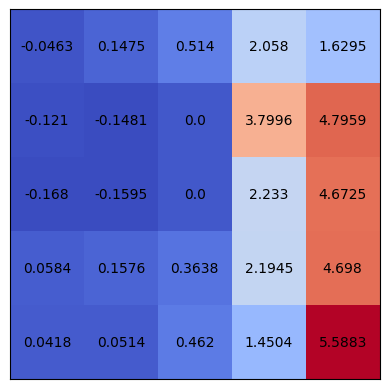

In [ ]:
gw, agent = reset()
print(gw)
viz_mc(gw, agent, 1000)